In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb,rgb2hsv,hsv2rgb
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('./Result/BuenosAires_filtered_lab.csv')

In [28]:
lab = df.values[:,1:]

In [29]:
def Modified_K_mean(lab, k,threshold,colors_number_threhold = False):
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=100,
        tol=1e-04, random_state=42
    )
    km.fit(lab)
    print(f'K = {k} is done ')

    ori_RC = np.array(km.cluster_centers_).astype(np.float32)

    # get the hue of the centroids of the clusters to filter out the
    H_RC = rgb2hsv(lab2rgb(ori_RC))[:,0]

    H_RC = H_RC.reshape(-1,1)

    RC_combination = np.concatenate((H_RC,ori_RC),axis=1)

    # sort the hue ascending , the closet neighbor is the value front and after
    RC_comb_sorted = RC_combination[RC_combination[:, 0].argsort()]
    print(RC_comb_sorted[:5])
    RCs = []
    if colors_number_threhold:
        for _ in range(len(RC_comb_sorted)):
            hue =  RC_comb_sorted[_,0]
            if _ == 0:
                hue_after = RC_comb_sorted[_+1,0]
                dis_1 = 0 # just to make the progress consistent
                dis_2 = hue_after - hue
            elif _ == len(RC_comb_sorted) -1:
                hue_front = RC_comb_sorted[_-1,0]
                dis_2 = 0 # just to make the progress consistent
                dis_1 = hue - hue_front
            else:
                hue_front = RC_comb_sorted[_-1,0]
                hue_after = RC_comb_sorted[_+1,0]
                dis_1 = hue - hue_front
                dis_2 = hue_after - hue



            if (dis_2 >= threshold) and (dis_1 >= threshold):
                RCs.append(RC_comb_sorted[_,1:])
    else:
        for _ in range(len(RC_comb_sorted)):
            hue =  RC_comb_sorted[_,0]
            if _ == 0:
                hue_after = RC_comb_sorted[_+1,0]
                dis_1 = 1 # just to make the progress consistent
                dis_2 = hue_after - hue
            elif _ == len(RC_comb_sorted) -1:
                hue_front = RC_comb_sorted[_-1,0]
                dis_2 = 1 # just to make the progress consistent
                dis_1 = hue - hue_front
            else:
                hue_front = RC_comb_sorted[_-1,0]
                hue_after = RC_comb_sorted[_+1,0]
                dis_1 = hue - hue_front
                dis_2 = hue_after - hue



            if (dis_2 <= threshold[1]) and (dis_1 <= threshold[1]) and (dis_2 >= threshold[0]) and (dis_1 >= threshold[0]) :
                RCs.append(RC_comb_sorted[_,1:])
    return RCs





In [38]:
RC = Modified_K_mean(lab=lab,k=128,threshold=[0.005,1])

K = 128 is done 
[[3.17400433e-02 3.20416451e+01 1.79183407e+01 1.44622345e+01]
 [5.11009730e-02 1.07921934e+01 2.81388187e+00 3.46816587e+00]
 [5.93326651e-02 1.77267704e+01 3.29972434e+00 4.98406315e+00]
 [6.96111843e-02 3.10920486e+01 6.82571769e-01 1.49816763e+00]
 [8.42344761e-02 2.49510460e+01 1.90604818e+00 6.36895084e+00]]


In [39]:

len(RC)

8

In [40]:
RC = np.array(RC)

In [41]:
sc_palette = lab2rgb(RC).reshape((1,-1,3))

In [42]:
sc_palette

array([[[0.1360685 , 0.10826994, 0.09597794],
        [0.19965056, 0.16305774, 0.14282978],
        [0.29536825, 0.28518683, 0.2778844 ],
        [0.2584674 , 0.22707814, 0.19500259],
        [0.22618005, 0.18613404, 0.12696451],
        [0.1920017 , 0.23057821, 0.19622847],
        [0.43796703, 0.44433364, 0.523574  ],
        [0.13026828, 0.1250836 , 0.1569303 ]]], dtype=float32)

In [43]:
sc_palette_df = pd.DataFrame(RC)

In [44]:
sc_palette_df.to_csv('./Result/Code_Result/LosAngeles_0.005_Modified_Kmean.csv',index=False)

(Text(0.5, 1.0, 'BuenosAires Modified LAB'),
 (-0.5, 7.5, 0.5, -0.5))

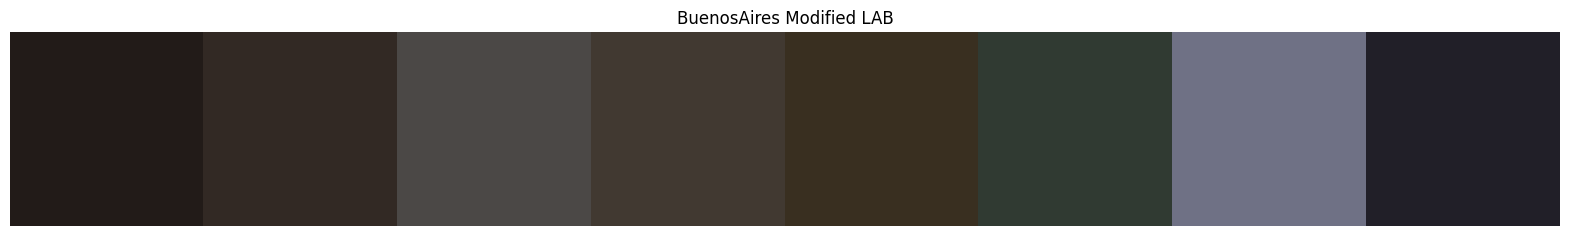

In [45]:
plt.figure(figsize=(20,4))
plt.title('BuenosAires Modified LAB'),plt.imshow(sc_palette),plt.axis('off')
#plt.savefig('./Result/Code_Result/BuenosAires_0.01_0.03_Modified_Kmean.png',dpi=300)

In [26]:
import palette_reduction as pr

In [44]:
def perceived_brightness(rgb_color):
    r, g, b = rgb_color[:,0],rgb_color[:,1],rgb_color[:,2]
    return np.sqrt(0.299 * r**2 + 0.587 * g**2 + 0.114 * b**2)

def sort_colors_by_brightness(rgb_array):
    # Calculate the perceived brightness for each color in the RGB array
    brightness_values = perceived_brightness(rgb_array)
    # Sort the RGB array based on the calculated brightness values
    sorted_rgb_array = [color for _, color in sorted(zip(brightness_values, rgb_array))]

    return np.array(sorted_rgb_array)

In [45]:
df = pd.read_csv('./Result/Code_Result/LosAngeles_0.01_Modified_Kmean.csv')
center = df.values
rgb = lab2rgb(center)

In [46]:
RC = pr.get_palette(6,rgb,'')

Extracting palette...
original vertices number: 9
final vertices number: 6
Palette extracted.


In [47]:
rgb_sorted = sort_colors_by_brightness(RC)
Rc = rgb_sorted.reshape(1,-1,3)

In [48]:
df = pd.read_csv('./Result/Code_Result/BuenosAires_0.01_Modified_Kmean.csv')
center = df.values
center_sorted = sort_colors_by_brightness(center)
center = lab2rgb(center_sorted).reshape(1,-1,3)

In [49]:
center

array([[[0.13026824, 0.12508361, 0.15693031],
        [0.13557201, 0.16670825, 0.1364349 ],
        [0.2109094 , 0.20769866, 0.21932539],
        [0.19200177, 0.23057819, 0.19622849],
        [0.29536821, 0.28518688, 0.27788443],
        [0.2731773 , 0.31376121, 0.28913873],
        [0.42327081, 0.25062883, 0.21001667],
        [0.43796707, 0.44433365, 0.52357402]]])

In [19]:
points = np.random.randint(0, 1, size=(1,12, 5))

NameError: name 'points' is not defined

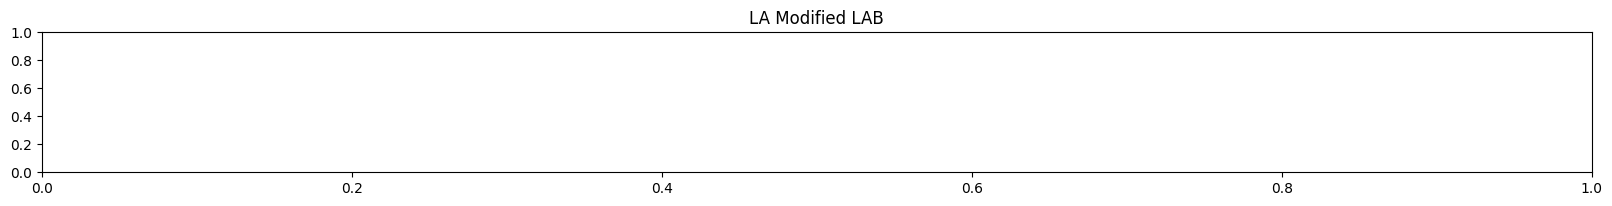

In [46]:
plt.figure(figsize=(20,4))
plt.subplot(211),plt.title('LA Modified LAB'),plt.imshow(points),plt.axis('off')

plt.show()
#plt.savefig('./Result/Code_Result/BuenosAires_0.01_Modified_Kmean.png',dpi=300)